#### [ 넷플릭스 사용자 분석 ]
- 구독 유형별 사용자 수
- 월간 사용료 분석
- 구독 유형에 따른 연령, 성별, 국가 분포 분석
- 과정
    * 데이터파일 확인 
        - 첫번째 줄이 컬럼명 맞는지 확인 
        - 불필요한 컬럼이나 행이 있는지 확인
        - 결측지 정도 확인
    * 데이터 전처리 : 데이터 정리 및 손질 
        - 파일 확인 후 체크한 사항 진행 
        - 결측치 처리
        - 이상치 처리
        - 중복데이터 처리
        - 형변환 => 실제 데이터와 타입 일치 
    * 데이터 가공 : 분석하고자하는 데이터 형태 
        - 행인덱스 처리 : 멀티인덱스/컬럼=>행인덱스/행인덱스 초기화 
        - 필요한 컬럼 & 행 추출 
        - 추가적인 결측치/이상치/중복데이터 처리 
        - 형변환 => 연속 -> 범주형, 범주형 -> 연속형
    * 데이터 분석 
        - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
        - 시각화 및 분석 결과 텍스트 요약 정리

In [1]:
# [1] 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글폰트 설정 => 폰트 매니저 모듈
from matplotlib import font_manager as fm 
from matplotlib import rc 

# 적용할 폰트 파일
FONT_FILE = r'MalangmalangR.ttf'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name)

In [2]:
# [2] 데이터 준비
userDF=pd.read_csv('Netflix Userbase.csv')

In [3]:
# [3] 데이터 확인
#   - 첫번째 열이 컬럼명이 맞는지 확인 
userDF.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
#   - 불필요한 컬럼이나 행이 있는지 확인
userDF=userDF.drop(['Plan Duration','Device'],axis=1)
userDF

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male
...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female


In [5]:
userDF.columns=['User ID','구독 유형','월 수익','가입일','최종 결제일','국가','나이','성별']
userDF               

,User ID,구독 유형,월 수익,가입일,최종 결제일,국가,나이,성별
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male
...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female


In [6]:
userDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User ID  2500 non-null   int64 
 1   구독 유형    2500 non-null   object
 2   월 수익     2500 non-null   int64 
 3   가입일      2500 non-null   object
 4   최종 결제일   2500 non-null   object
 5   국가       2500 non-null   object
 6   나이       2500 non-null   int64 
 7   성별       2500 non-null   object
dtypes: int64(3), object(5)
memory usage: 156.4+ KB


In [7]:
# 결측치 확인
userDF.isna().sum()

User ID    0
구독 유형      0
월 수익       0
가입일        0
최종 결제일     0
국가         0
나이         0
성별         0
dtype: int64

In [8]:
userDF.describe()

,User ID,월 수익,나이
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


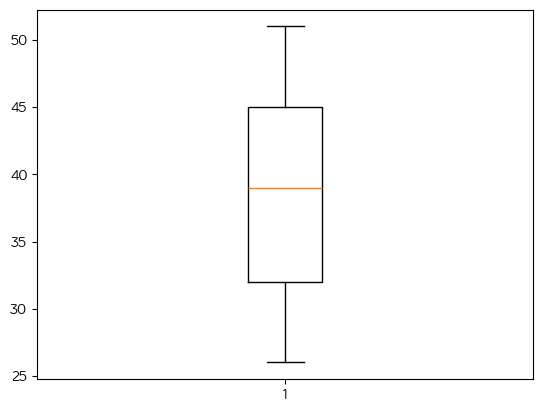

In [9]:
# 이상치 확인
retDict=plt.boxplot(userDF['나이'],whis=1)
plt.show()

In [10]:
#중복 확인
userDF.duplicated().sum()

0

#### 구독 유형별 사용자 수 분석  
(한국기준)
- Basic
    * 월 : 5,500원
    * 해상도 : 1080p(풀HD)
    * 지원장치 : TV, 컴퓨터, 휴대폰, 태블릿
    * 동시에 시청할 수 있는 기기 : 2
    * 장치 다운로드 :2 
    * 광고: O

- Standard
    * 월 : 13,500원
    * 해상도 : 1080p(풀HD)
    * 지원장치 : TV, 컴퓨터, 휴대폰, 태블릿
    * 동시에 시청할 수 있는 기기 : 2
    * 장치 다운로드 :2 
    * 광고: X
- Premium
    * 월 : 17,000원
    * 해상도 : 4K(울트라HD) + HDR
    * 공간 오디오(몰입형 사운드) 포함
    * 지원장치 : TV, 컴퓨터, 휴대폰, 태블릿
    * 동시에 시청할 수 있는 기기 : 4
    * 장치 다운로드 : 6
    * 광고: X

In [11]:
sub_type=userDF['구독 유형'].value_counts()
sub_type=pd.DataFrame(sub_type)
sub_type

,count
구독 유형,
Basic,999
Standard,768
Premium,733


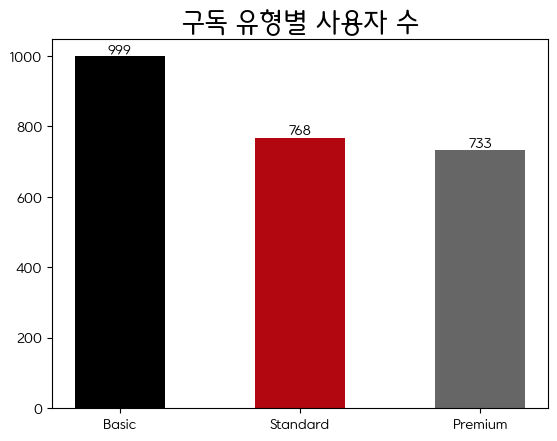

In [12]:
b=plt.bar(sub_type.index,sub_type['count'],width=0.5,color=['#000000','#B20710','#666666'])
plt.title("구독 유형별 사용자 수",fontsize=20)
plt.bar_label(b,sub_type['count'],label_type='edge')
plt.show()

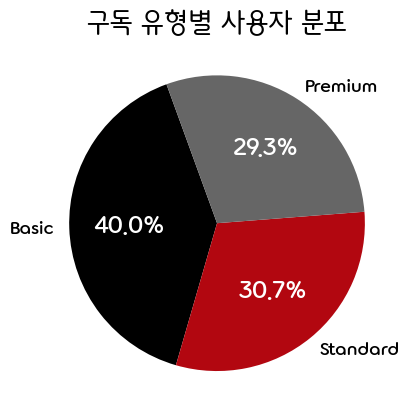

In [13]:
labels = sub_type.index
cnt = sub_type['count']
fig, ax = plt.subplots()

wedges, texts, autotexts=ax.pie(cnt, labels=labels,autopct='%1.1f%%',colors=['#000000','#B20710','#666666'],startangle=110)
plt.setp(texts, weight='bold', color='#000000' ,size=13)  # 레이블 텍스트 굵기와 색상 설정
plt.setp(autotexts, weight='bold', color='white',size=17)# 자동 생성된 퍼센트 텍스트 굵기와 색상 설정

plt.title("구독 유형별 사용자 분포",fontsize=20)
plt.show()


- 월간 사용료 분석

- 구독 유형에 따른 연령, 성별, 국가 분포 분석

In [14]:
userDF.head()

,User ID,구독 유형,월 수익,가입일,최종 결제일,국가,나이,성별
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male


In [15]:
# 나이 범주화하는 함수
def category_age(age):
    if age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    else:
        return '60대 이상'
    

#나이 범주화 해서 열 추가
userDF['연령대'] = userDF['나이'].apply(category_age)
userDF

,User ID,구독 유형,월 수익,가입일,최종 결제일,국가,나이,성별,연령대
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,20대
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,30대
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,40대
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,50대
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,30대
...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,20대
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,30대
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,30대
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,40대


In [16]:
userDF.loc[userDF.index,'구독 유형']

0          Basic
1        Premium
2       Standard
3       Standard
4          Basic
          ...   
2495     Premium
2496       Basic
2497    Standard
2498    Standard
2499       Basic
Name: 구독 유형, Length: 2500, dtype: object

In [17]:
sub_type=userDF['구독 유형'].unique()
Country=userDF['국가'].unique()
gender=userDF['성별'].unique()
age_group=userDF['연령대'].unique()
print(sub_type,'\n',Country,'\n',gender,'\n',age_group)


['Basic' 'Premium' 'Standard'] 
 ['United States' 'Canada' 'United Kingdom' 'Australia' 'Germany' 'France'
 'Brazil' 'Mexico' 'Spain' 'Italy'] 
 ['Male' 'Female'] 
 ['20대' '30대' '40대' '50대']


In [18]:
userDF[(userDF['성별']=='Male')&(userDF['연령대']==age_group[0])]['성별'].count()

164

In [19]:
male=[]
female=[]
for j in range(3):
    for i in range(4):
        male.append(userDF[(userDF['구독 유형']==sub_type[j])&(userDF['성별']==gender[0])&(userDF['연령대']==age_group[i])]['성별'].count())
        female.append(userDF[(userDF['구독 유형']==sub_type[j])&(userDF['성별']==gender[0])&(userDF['연령대']==age_group[i])]['성별'].count())

male, female


([69, 208, 179, 31, 46, 151, 148, 24, 49, 167, 140, 31],
 [69, 208, 179, 31, 46, 151, 148, 24, 49, 167, 140, 31])

In [20]:
for i, sub in enumerate(sub_type):
    male=[]
    female=[]
    for age in age_group:
        male_count=userDF[(userDF['구독 유형']==sub)&(userDF['성별']==gender[0])&(userDF['연령대']==age)]['성별'].count()
        female_count=userDF[(userDF['구독 유형']==sub)&(userDF['성별']==gender[1])&(userDF['연령대']==age)]['성별'].count()
        male.append(male_count)
        female.append(female_count)
    print(male,female)



[69, 208, 179, 31] [54, 211, 209, 38]
[46, 151, 148, 24] [52, 142, 142, 28]
[49, 167, 140, 31] [37, 141, 178, 25]


[69, 208, 179, 31] [54, 211, 209, 38]
[46, 151, 148, 24] [52, 142, 142, 28]
[49, 167, 140, 31] [37, 141, 178, 25]


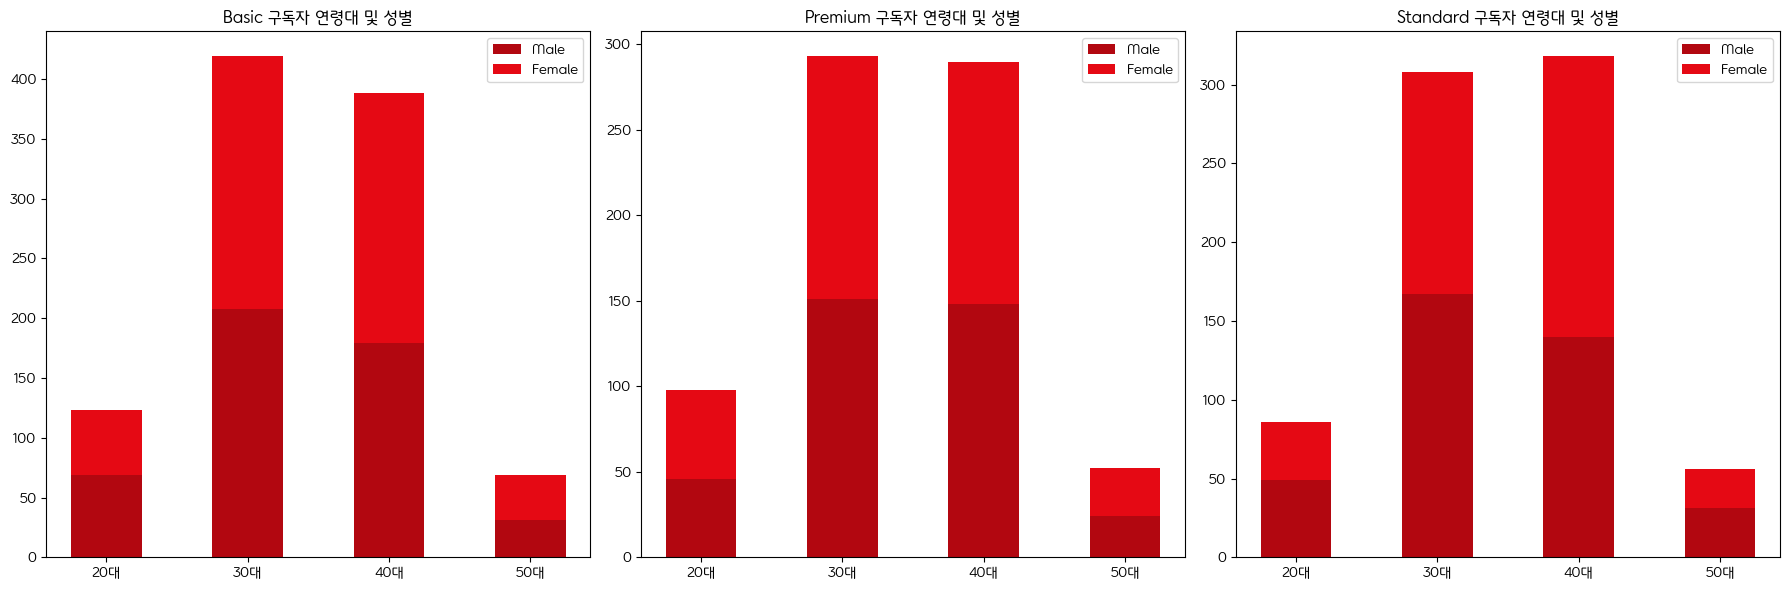

In [21]:
width = 0.5
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

colors = {"Male": "#B20710", "Female": '#E50914'}


for i, sub in enumerate(sub_type):
    ax = axs[i]
    bottom = np.zeros(len(age_group))
    male=[]
    female=[]
    for age in age_group:
        male_count=userDF[(userDF['구독 유형']==sub)&(userDF['성별']==gender[0])&(userDF['연령대']==age)]['성별'].count()
        female_count=userDF[(userDF['구독 유형']==sub)&(userDF['성별']==gender[1])&(userDF['연령대']==age)]['성별'].count()
        male.append(male_count)
        female.append(female_count)
    print(male,female)
    
    #차트 그리기
    ax.bar(age_group, male, width, label="Male", bottom=bottom, color=colors["Male"])
    ax.bar(age_group, female, width, label="Female", bottom=bottom + male, color=colors["Female"])

    ax.set_title(f"{sub} 구독자 연령대 및 성별")
    ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


##### [구독 유형별 연령대 및 성비]
- 성비는 구독 유형, 연령에 상관없이 비슷
- 연령대는 구독 유형과 상관 없이 30대, 40대가 가장 많음

Basic [96, 77, 1, 15, 69, 19, 68, 2, 50, 90] [103, 68, 2, 16, 80, 17, 78, 2, 60, 86]
Premium [73, 48, 0, 56, 2, 73, 17, 0, 99, 1] [72, 40, 0, 45, 1, 74, 16, 0, 113, 3]
Standard [57, 35, 89, 23, 18, 0, 3, 92, 69, 1] [50, 49, 91, 28, 13, 0, 1, 87, 60, 2]


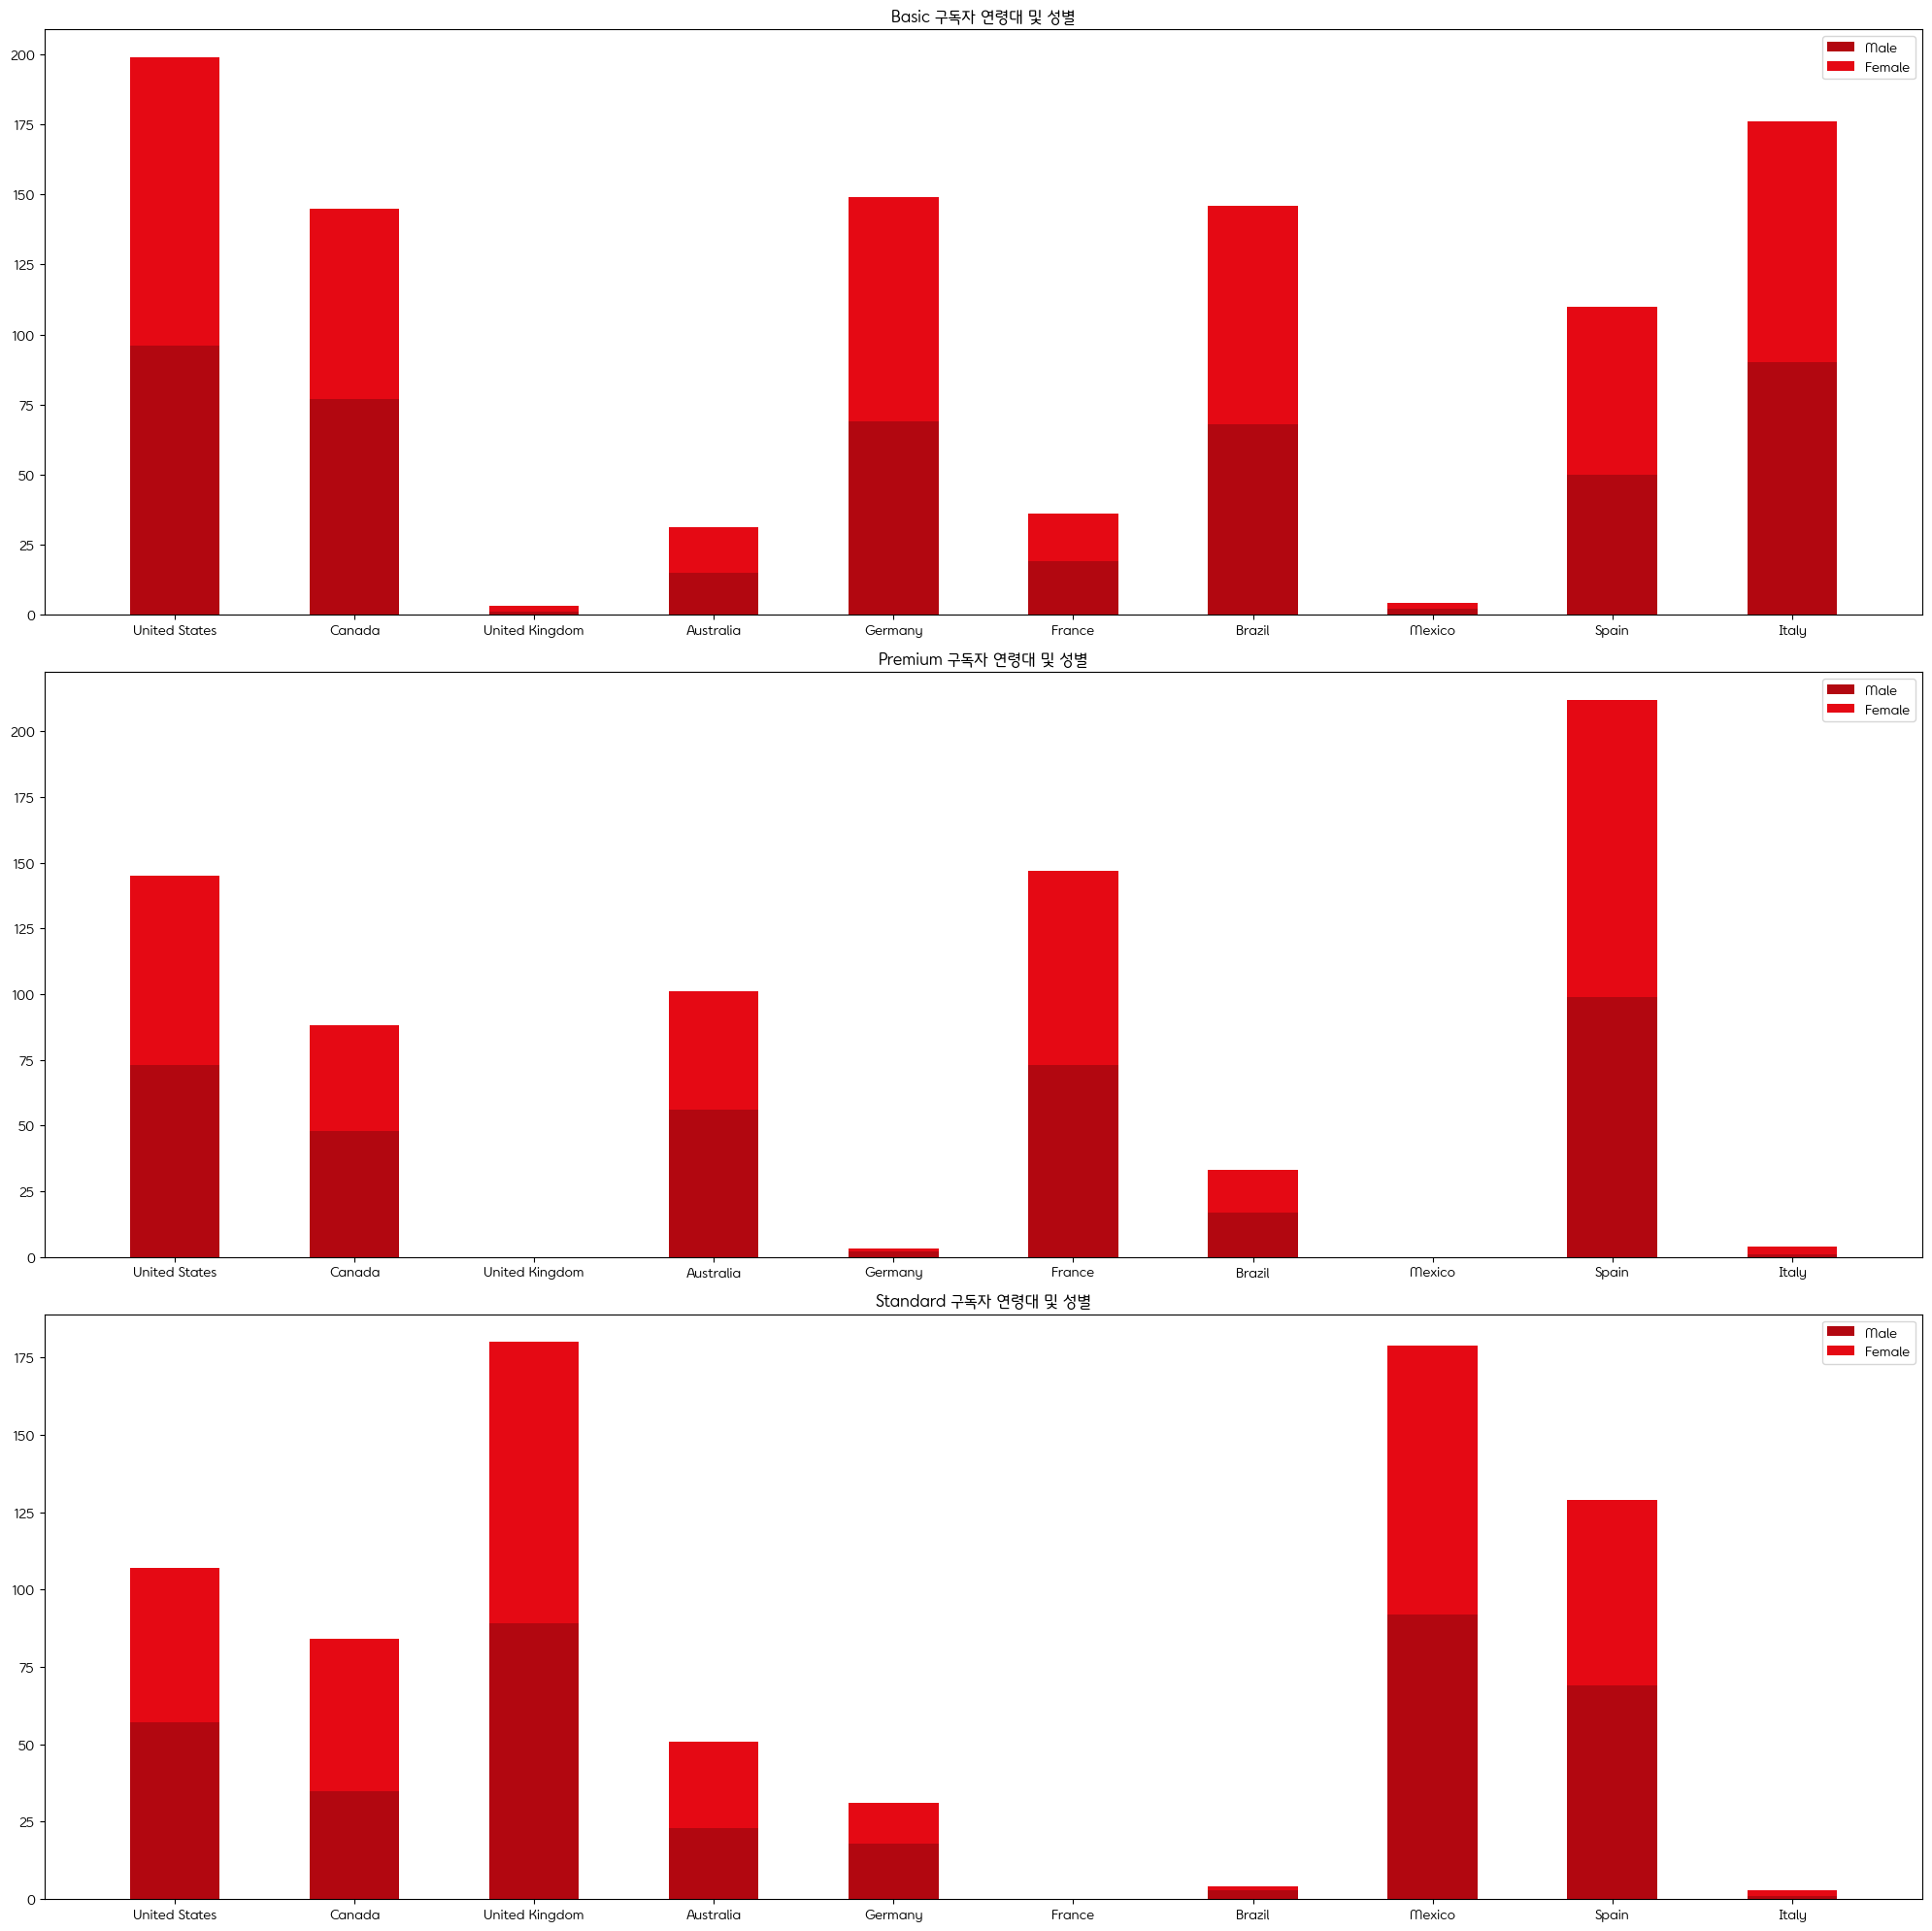

In [22]:
width = 0.5
fig, axs = plt.subplots(3,1, figsize=(20, 20))

colors = {"Male": "#B20710", "Female": '#E50914'}


for i, sub in enumerate(sub_type):
    ax = axs[i]
    bottom = np.zeros(len(Country))
    male=[]
    female=[]
    for c in Country:
        male_count=userDF[(userDF['구독 유형']==sub)&(userDF['성별']==gender[0])&(userDF['국가']==c)]['성별'].count()
        female_count=userDF[(userDF['구독 유형']==sub)&(userDF['성별']==gender[1])&(userDF['국가']==c)]['성별'].count()
        male.append(male_count)
        female.append(female_count)
    print(sub,male,female)
    
    #차트 그리기
    ax.bar(Country, male, width, label="Male", bottom=bottom, color=colors["Male"])
    ax.bar(Country, female, width, label="Female", bottom=bottom + male, color=colors["Female"])

    ax.set_title(f"{sub} 구독자 연령대 및 성별")
    ax.legend(loc="upper right")

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

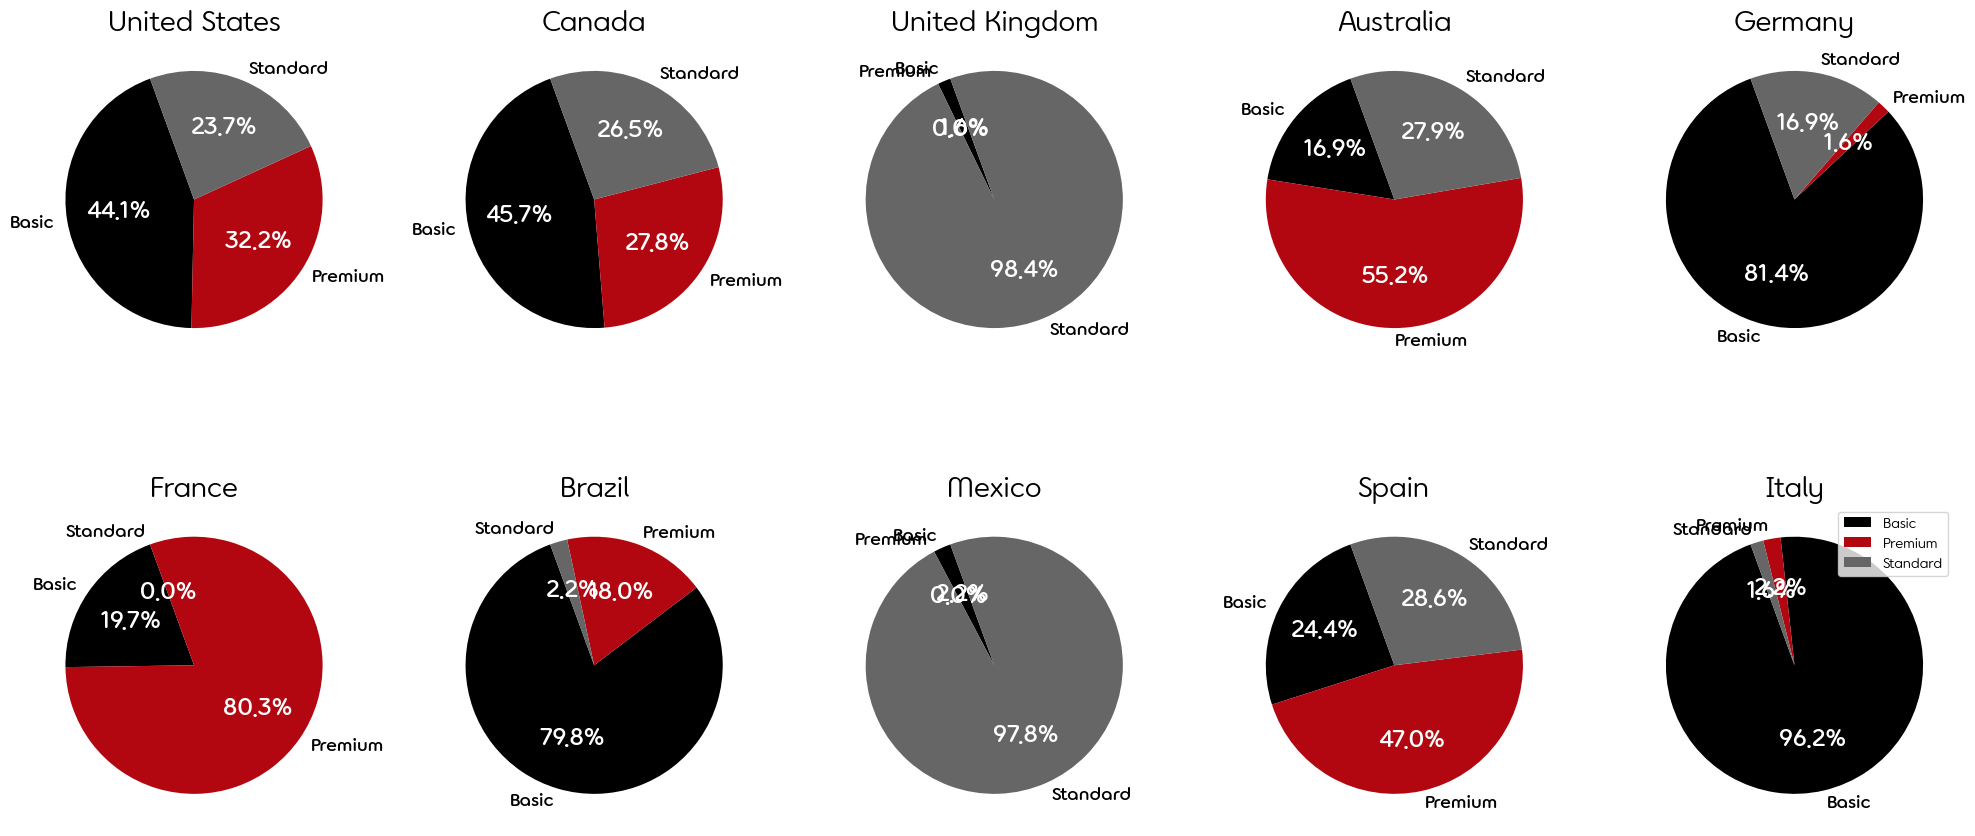

In [23]:
fig, axs = plt.subplots(2,5,figsize=(20, 10))
labels = sub_type
for i,c in enumerate(Country):
    ax = axs[i//5,i%5] 
    value=[]
    for sub in sub_type:
        cnt=userDF[(userDF['국가']==c)&(userDF['구독 유형']==sub)]['구독 유형'].count()
        value.append(cnt)
    wedges,texts, autotexts=ax.pie(value, labels=labels,autopct='%1.1f%%',colors=['#000000','#B20710','#666666'],startangle=110)
    plt.setp(texts, weight='bold', color='#000000' ,size=13)  # 레이블 텍스트 굵기와 색상 설정
    plt.setp(autotexts, weight='bold', color='white',size=17)# 자동 생성된 퍼센트 텍스트 굵기와 색상 설정
    plt.legend()
    ax.set_title(c,fontsize=20)
    
plt.tight_layout()
plt.show()


In [24]:
# for c in Country:
#     for i, sub in enumerate(sub_type):
#         cnt=userDF[(userDF['국가']==c)&(userDF['구독 유형']==sub)]['국가'].count()
#         print(f'{sub},{c} : {cnt}')